In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.activations import relu, linear, softmax
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import L2
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

In [2]:
# Load the Iris dataset
iris = load_iris()

# Get the features and target variable
features = iris.data  # Use the first two features (sepal length and sepal width)
target = iris.target

print(features.shape)
print(target.shape)

(150, 4)
(150,)


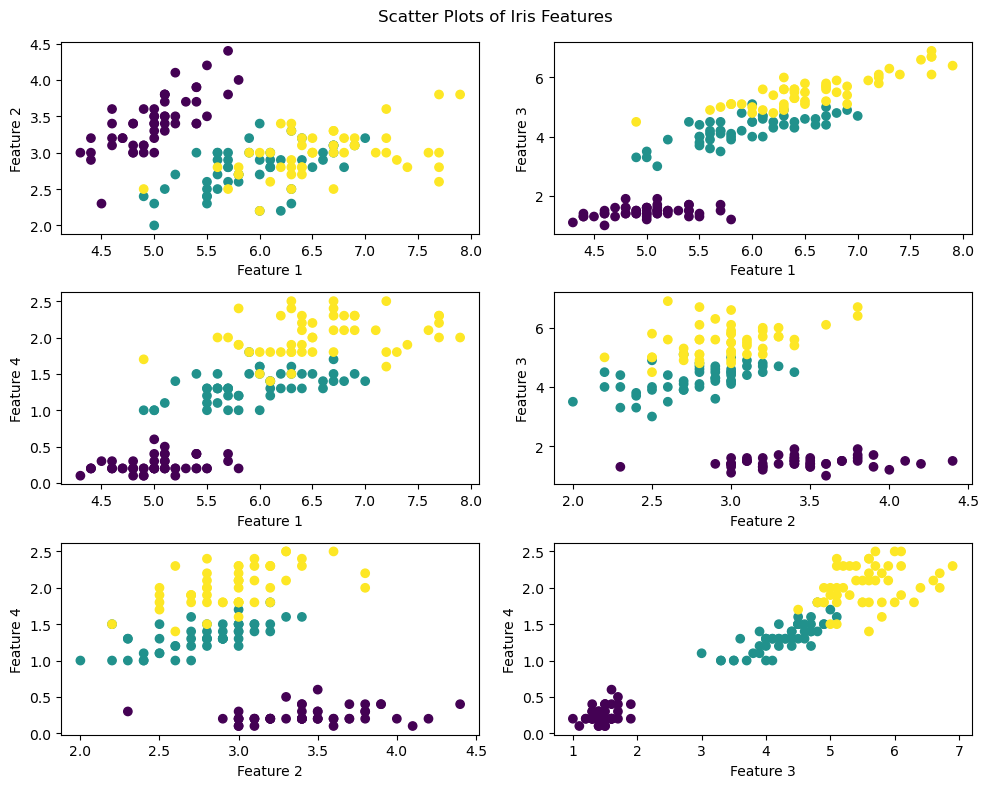

In [3]:
# Create a figure and axes for the subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 8))

# Flatten the axes array to simplify the loop
axes = axes.flatten()

# Loop through the subplots and plot scatter plots
k = 0
for i in range(len(features[0])):
    for j in range(i+1, len(features[0])):
        ax = axes[k]
        k += 1
        # Plot the scatter plot
        ax.scatter(features[:, i], features[:, j], c=target, cmap='viridis')

        # Set the axis labels
        ax.set_xlabel('Feature {}'.format(i+1))
        ax.set_ylabel('Feature {}'.format(j+1))

# Add a suptitle and tight layout
plt.suptitle('Scatter Plots of Iris Features')
plt.tight_layout()

# Display the plot
plt.show()

In [4]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(features[:, :2], target, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (90, 2)
the shape of the training set (target) is: (90,)

the shape of the cross validation set (input) is: (30, 2)
the shape of the cross validation set (target) is: (30,)

the shape of the test set (input) is: (30, 2)
the shape of the test set (target) is: (30,)


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
mean_values = scaler.mean_
std_values = scaler.scale_
X_cv_scaled = scaler.transform(x_cv)
X_test_scaled = scaler.transform(x_test)

In [6]:
model = tf.keras.Sequential([
    Dense(units=10, activation='relu', kernel_regularizer=L2(0.01)),
    Dense(units=5, activation='relu', kernel_regularizer=L2(0.01)),
    Dense(units=3, activation='linear')
])

In [7]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=SparseCategoricalCrossentropy(from_logits=True)
)

In [8]:
history = model.fit(X_train_scaled, y_train, epochs=300, verbose=0)

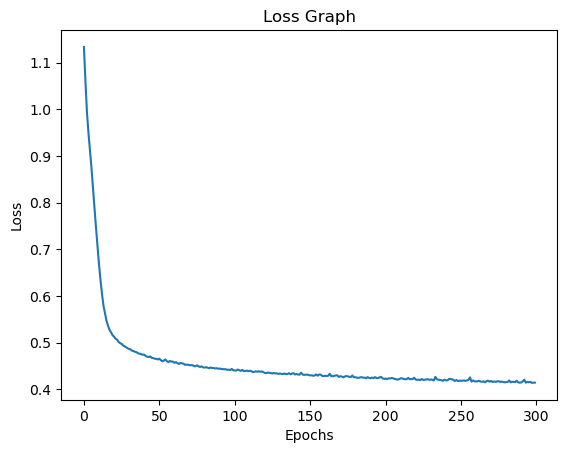

In [9]:
# Access the loss values from the history object
loss_values = history.history['loss']

# Plot the loss graph
plt.plot(loss_values)
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [10]:
threshold = 0.5
# Record the fraction of misclassified examples for the cross validation set
yhat = model.predict(X_cv_scaled)
ypred = np.argmax(yhat, axis=1)
cv_error = np.mean(ypred != y_cv)

# Compute the test error
yhat = model.predict(X_test_scaled)
ypred = np.argmax(yhat, axis=1)
test_error = np.mean(ypred != y_test)

print(f"CV error = {cv_error}, Test error = {test_error}")

1/1 [==============================] - 0s 64ms/step
CV error = 0.2, Test error = 0.26666666666666666


313/313 [==============================] - 1s 2ms/step


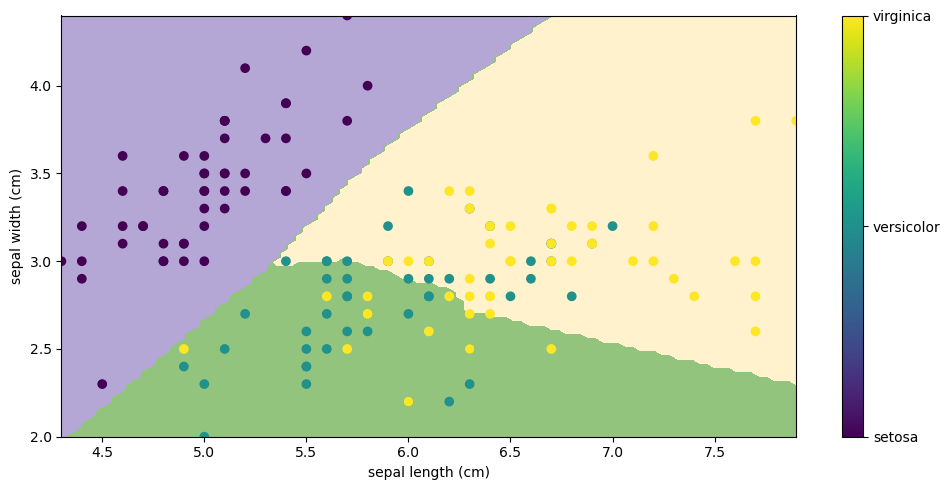

In [11]:
custom_cmap = ListedColormap(['#b4a7d6','#93c47d','#fff2cc'])
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

x0, x1 = np.meshgrid(
    np.linspace(iris.data[:, 0].min(), iris.data[:, 0].max(), 100).reshape(-1, 1),
    np.linspace(iris.data[:, 1].min(), iris.data[:, 1].max(), 100).reshape(-1, 1),
)

X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_scaled = scaler.transform(X_new)

y_pred = np.argmax(model.predict(X_new_scaled), axis=1)
zz = y_pred.reshape(x0.shape)

plt.figure(figsize=(10, 5))
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.tight_layout()
plt.show()